#Trabalho Prático Python Avançado:
#Exercitar os seguintes conceitos trabalhados no Módulo:
##✓ Python para aprendizado de máquina.
##✓ Programação concorrente com Python.

In [ ]:
#importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#leitura dos dados csv e cria o dataframe
df = pd.read_csv("/content/datasets_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Pergunta 1**: Após a utilização da biblioteca pandas para a leitura dos dados e o método pandas.info() sobre o dataframe construído, é CORRETO afirmar que: *Não foram encontrados valores nulos após a leitura dos dados.*

**Pergunta 2**: Quantas linhas e colunas, respectivamente, existem no dataset? *768 e 9.*

**Pergunta 3**: Quantas colunas do tipo “float64” existem no dataset após a carga dos dados através do método pandas.read_csv()? *2.* 

In [ ]:
# estatísticas básicas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.loc[:, 'Age'].mean()

33.240885416666664

**Pergunta 4**: Qual é o valor médio presente na coluna “Age”? *33,24.* 

In [ ]:
cond = df['Outcome'] == 1
df[cond].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

**Pergunta 5**: Utilizando as entradas e a saída como apresentado no enunciado do trabalho, quantos valores da variável de saída “1” existem no conjunto de dados? *268.*

In [ ]:
#transforma os dados em array
entradas = df.iloc[:, :-1].values  #dados de entrada
saida = df.iloc[:, -1].values  #saídas ou target
#print(entradas)
#print(saida)

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler() #objeto para a normalização
#entradas_normalizadas
entradas_normalizadas = normaliza.fit_transform(entradas) #realiza a normalização dos dados

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split # função que realiza a divisão do dataset
# divide 30% para teste
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=42)


In [ ]:
#cria o dataframe
df_train = pd.DataFrame(y_train,columns=['Outcome'])
df_train.describe()

,Outcome
count,537.000000
mean,0.350093
std,0.477444
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df['Outcome'].count() * 70 / 100 # 70% para treinamento

537.6

**Pergunta 6**: Utilizando o método “train_test_split” como apresentado no enunciado, quantas instâncias (linhas) foram selecionadas para o conjunto de dados de treinamento do modelo? *537.* 

**Algoritmo KNN:**
clf_KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#treina o modelo
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(x_train, y_train) # Realiza o treinamento do classificador

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Realiza a previsão de classificaçao
y_pred_KNN = clf_KNN.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[118  33]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



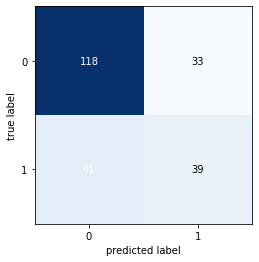

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_KNN = confusion_matrix(y_test, y_pred_KNN )
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_KNN)
plt.show()

**Pergunta 7**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique o algoritmo KNN. Qual é, aproximadamente, a acurácia do modelo? *0,68*

**Algoritmo Árvore de Decisão:**
clf_arvore = DecisionTreeClassifier(random_state=1)

In [ ]:
#treina o modelo
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(x_train,y_train) # Realiza o treinamento do classificador

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_arvore))
print(classification_report(y_test, y_pred_arvore))

[[106  45]
 [ 25  55]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



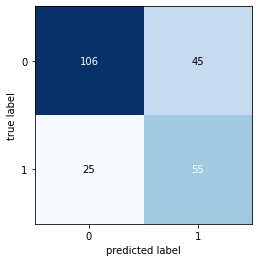

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_arvore = confusion_matrix(y_test, y_pred_arvore)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_arvore)
plt.show()

**Pergunta 8**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique o algoritmo Árvore de Decisão. Qual é, aproximadamente, a acurácia do modelo? *0,70.*

**Algoritmo Floresta Randômica:**
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

In [ ]:
#treina o modelo
from sklearn.ensemble import RandomForestClassifier # importa o classificador floresta randômica
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(x_train,y_train) # Realiza o treinamento do classificador

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_floresta))
print(classification_report(y_test, y_pred_floresta))

[[121  30]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       151
           1       0.63      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



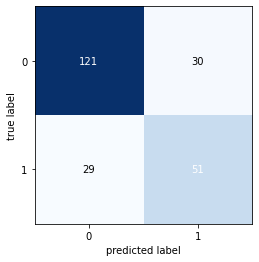

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_floresta = confusion_matrix(y_test, y_pred_floresta)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_floresta)
plt.show()

**Pergunta 9**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique o algoritmo Floresta Randômica. Qual é, aproximadamente, a acurácia do modelo? *0,74.*

**Algoritmo SVM:**
clf_svm=SVC(gamma='auto',random_state=1)

In [ ]:
#treina o modelo
from sklearn.svm import SVC # importa o classificador Suppor Vector Machine (SVM)
clf_svm = SVC(gamma='auto',random_state=1)
clf_svm.fit(x_train,y_train) # Realiza o treinamento do classificador

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_svm = clf_svm.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[136  15]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       151
           1       0.74      0.53      0.61        80

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



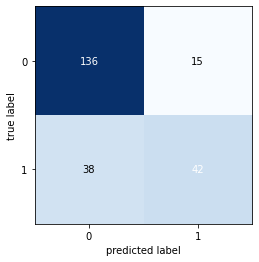

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_svm = confusion_matrix(y_test, y_pred_svm)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_svm)
plt.show()

**Pergunta 10**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir os dados entre treinamento e teste, aplique o algoritmo SVM. Qual é, aproximadamente, a acurácia do modelo? *0,77.*

**Algoritmo Rede MLP :**
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,
5), random_state=1)

In [ ]:
#treina o modelo
from sklearn.neural_network import MLPClassifier # importa o classificador Redes Neurais (MLP)
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(x_train,y_train) # Realiza o treinamento do classificador

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_mlp = clf_mlp.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[118  33]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



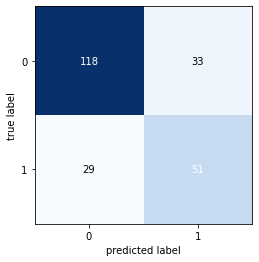

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_mlp = confusion_matrix(y_test, y_pred_mlp)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_mlp)
plt.show()

**Pergunta 11**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir os dados entre treinamento e teste, aplique o algoritmo MLP. Qual é, aproximadamente, a acurácia do modelo? *0,73.*

**Pergunta 12**: Dentre todos os modelo implementados seguindo o enunciado deste trabalho prático, qual foi aquele que alcançou maior acurácia? *SVM como classificador.*

**Pergunta 13**: Qual dos modelos implementados neste trabalho prático é classificado como um modelo de aprendizado de máquina não-supervisionado? *Nenhum deles.*

# **O código abaixo deve ser utilizado para as questões de concorrência:**

**Código 1**

In [ ]:
import threading
import time
from random import randint

In [ ]:
def funcao_1(num):
  n = num
  while n>0:
    n-=1
    print("n_1: {}".format(n))
    time.sleep(randint(0,2))

def funcao_2(num):
  n = num
  while n<100:
    n+=1
    print("n_2: {}".format(n))
    time.sleep(randint(0,2))

if __name__ == "__main__":
  t1 = threading.Thread(target=funcao_1, args=(0,)) 
  t2 = threading.Thread(target=funcao_2, args=(100,)) 

  t1.start()
  t2.start()

  t1.join()
  t2.join()

  print("Fim!")




Fim!


**Pergunta 14**: Implemente o código 1 presente no enunciado do trabalho. Sobre este código, é INCORRETO afirmar que: *A tarefa realizada pela funcao_1 sempre será finalizada antes da tarefa executada pela funcao_2.*

**Pergunta 15**: Considere o código 1. Inverta os parâmetros de entrada para as funções 1 e 2 ( entrada funcao_1=0 e entrada funcao_2=100). Após essas modificações, é INCORRETO afirmar que: *Se alterarmos, além dos parâmetros de entrada, os parâmetros da chamada sleep(randint()), é possível alterar o tempo de execução das threads.*